In [157]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from scipy.signal import savgol_filter
import pandas as pd

In [158]:
#Function for LSTM
df = np.array([0,1,2,3,2,1,0,1,2,3,2,1,0,1,2,3,2,1,0,1,2,3,2,1,0,1,2,3,2,1,0,1,2,3,2,1])
#meanDf= df.mean()
#stdDf = df.std()
#df = (df - meanDf) / stdDf
df_weak = [0,1,2,3,4,5,6,7,8,9,10]


class Class_LSTM:
    
    def __init__(self, inputData, window):
        self.df = inputData
        self.meanDf = self.df.mean()
        self.stdDf = self.df.std()
        self.smoothBool = 0
        self.dfNorm = (self.df - self.meanDf) / self.stdDf
        self.window = window
    
    def function_TimeSeriesGenerator(self):
        self.listData = np.array([])
        self.listLabel = np.array([])
        if self.smoothBool == 0:
            for i in range(len(self.dfNorm)-self.window):
                self.tmp_data = self.dfNorm[i:i+self.window]
                self.tmp_label = self.dfNorm[i+self.window]
                self.listData = np.append(self.listData, self.tmp_data)
                self.listLabel = np.append(self.listLabel, self.tmp_label)
            self.arrayData = np.reshape(self.listData, (i+1, self.window,1))
            self.paramShape = (self.window, 1)
        else:
            for i in range(len(self.dfSmooth)-self.window):
                self.tmp_data = self.dfSmooth[i:i+self.window]
                self.tmp_label = self.dfSmooth[i+self.window]
                self.listData = np.append(self.listData, self.tmp_data)
                self.listLabel = np.append(self.listLabel, self.tmp_label)
            self.arrayData = np.reshape(self.listData, (i+1, self.window,1))
            self.paramShape = (self.window, 1)
            

        return self.arrayData, self.listLabel, self.paramShape
    
    def function_Smooth(self, window2):
        self.savgolWindow = window2
        if self.savgolWindow == 0:
            self.smoothBool = 0
        else:
            self.dfSmooth = savgol_filter(self.dfNorm, self.savgolWindow, 2)
            self.smoothBool = 1
        
    
        

    def functionLSTM_Model(self, input_layer, nbHidden):
        self.inputLayer = input_layer
        self.hiddenLayers = nbHidden
        self.lstmShape = np.shape(self.arrayData[1])
        self.output_layer = 1
        self.model = Sequential()
        #INPUT LAYER
        if self.hiddenLayers == 0:
            self.model.add(LSTM(self.inputLayer, input_shape = self.lstmShape, return_sequences=False))
        else:
            self.model.add(LSTM(self.inputLayer, input_shape = self.lstmShape, return_sequences=True))

        #HIDDEN LAYER    
        for i in range(0,self.hiddenLayers):
            if i+1 == self.hiddenLayers:
                self.model.add(LSTM(self.inputLayer))           
            else:
                self.model.add(LSTM(self.inputLayer, return_sequences=True))
        adamOpti = Adam(lr = 0.001)        
        self.model.add(Dense(1, activation = "linear"))
        self.model.compile(loss='mean_squared_error', optimizer=adamOpti)

        return self.model
    
    def function_Summary(self):
        print(self.model.summary())
    
    def function_Training(self, epok=100, bs=1, val_split=0.2):
        self.epk = epok
        self.sizeBatch = bs
        self.split = val_split
        self.model.fit(self.arrayData, self.listLabel, epochs=100, batch_size=1, verbose=2, validation_split=0.2)
        

    def function_Nostradamus(self, windowPredict):
        if self.smoothBool ==0:
            self.predictWindow = windowPredict
            self.nostradamus = np.array(self.dfNorm[-self.window:])
            self.nostradamus = np.reshape(self.nostradamus, (1,self.window,1))
            self.prediction = np.array([])
            for i in range(self.predictWindow):
                self.tmp_pred = self.model.predict(self.nostradamus[i:i+1])
                self.pred_tmp = np.append(self.nostradamus[i], self.tmp_pred)
                self.pred_tmp = self.pred_tmp[1:]
                self.pred_tmp = np.reshape(self.pred_tmp, (self.window,1))               
                self.nostradamus = np.append(self.nostradamus, self.pred_tmp)              
                self.nostradamus = np.reshape(self.nostradamus, (i+2,self.window,1))               
                self.prediction = np.append(self.prediction, self.tmp_pred)
        else:
            self.predictWindow = windowPredict
            self.nostradamus = np.array(self.dfNorm[-self.window:])
            self.nostradamus = np.reshape(self.nostradamus, (1,self.window,1))
            self.prediction = np.array([])
            for i in range(self.predictWindow):
                self.tmp_pred = self.model.predict(self.nostradamus[i:i+1])
                self.pred_tmp = np.append(self.nostradamus[i], self.tmp_pred)
                self.pred_tmp = self.pred_tmp[1:]
                self.pred_tmp = np.reshape(self.pred_tmp, (self.window,1))               
                self.nostradamus = np.append(self.nostradamus, self.pred_tmp)              
                self.nostradamus = np.reshape(self.nostradamus, (i+2,self.window,1))               
                self.prediction = np.append(self.prediction, self.tmp_pred)
            

        return self.prediction
    
    
    def function_Plot(self, X_tick):
        self.X = X_tick
        if self.smoothBool == 0:
            plt.plot(self.X, self.dfNorm, c = 'darkblue')
        else:
            plt.plot(self.X, self.dfSmooth, c = 'darkblue')

"\n    def function_SeriesGenerator2(listInput, param, y_label):\n        param1 = param\n        ylabel = y_label\n        listInputData = listInput\n        listData = np.array([])\n        listLabel = np.array([])\n        listVectorLabel = np.array([])\n        for i in range(len(listInputData)-param1-ylabel+1):\n            tmp_data = listInputData[i:i+param1]\n            print(tmp_data)\n            tmp_label = listInputData[i+param1:i+param1+ylabel]\n            print(tmp_label)\n            listData = np.append(listData, tmp_data)\n            listLabel = np.append(listLabel, tmp_label)\n        print(i+1)\n        print(ylabel)\n        arrayData = np.reshape(listData, (i+1,param1, 1))\n        paramShape = (param1, 1)\n        print(np.shape(listLabel))\n        listLabel = np.reshape(listLabel, (i+1,y_label))\n        print('glagla' + str(listLabel))\n\n        return arrayData, listLabel, paramShape\n"

In [217]:
covid_df = pd.read_csv('donnees-hospitalieres-nouveaux-covid19-2021-02-11-19h03.csv', sep=';')
df_2 = covid_df.groupby('jour')['incid_dc', 'incid_rea', 'incid_hosp'].sum()
df_2.head()

,incid_dc,incid_rea,incid_hosp
jour,,,
2020-03-19,155,438,2229
2020-03-20,83,242,1256
2020-03-21,115,298,1540
2020-03-22,124,309,1534
2020-03-23,189,448,2053


In [221]:
covid = Class_LSTM(df_2['incid_dc'],15)

In [224]:
covid.function_Smooth(49)

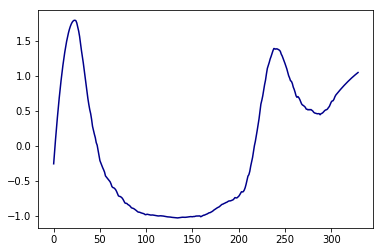

In [225]:
covid.function_Plot(np.linspace(0,329,330))

In [226]:
covid.function_TimeSeriesGenerator()

(array([[[-0.2538878 ],
         [-0.07749226],
         [ 0.09096691],
         ...,
         [ 1.33905831],
         [ 1.42021743],
         [ 1.49344017]],
 
        [[-0.07749226],
         [ 0.09096691],
         [ 0.25148971],
         ...,
         [ 1.42021743],
         [ 1.49344017],
         [ 1.55872655]],
 
        [[ 0.09096691],
         [ 0.25148971],
         [ 0.40407614],
         ...,
         [ 1.49344017],
         [ 1.55872655],
         [ 1.61607655]],
 
        ...,
 
        [[ 0.83620701],
         [ 0.85072793],
         [ 0.86499827],
         ...,
         [ 0.99391995],
         [ 1.00543395],
         [ 1.01669737]],
 
        [[ 0.85072793],
         [ 0.86499827],
         [ 0.87901803],
         ...,
         [ 1.00543395],
         [ 1.01669737],
         [ 1.02771021]],
 
        [[ 0.86499827],
         [ 0.87901803],
         [ 0.89278722],
         ...,
         [ 1.01669737],
         [ 1.02771021],
         [ 1.03847248]]]),
 array([ 1.55872655

In [228]:
covid.functionLSTM_Model(16,0)

In [229]:
covid.function_Summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, 16)                1152      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
covid.function_Training()

Train on 252 samples, validate on 63 samples
Epoch 1/100
 - 6s - loss: 0.1444 - val_loss: 0.0053
Epoch 2/100
 - 2s - loss: 0.0273 - val_loss: 0.0030
Epoch 3/100
 - 2s - loss: 0.0108 - val_loss: 5.7753e-04
Epoch 4/100
 - 3s - loss: 0.0037 - val_loss: 2.4838e-04
Epoch 5/100
 - 2s - loss: 0.0029 - val_loss: 0.0034
Epoch 6/100
 - 2s - loss: 0.0023 - val_loss: 3.6671e-04
Epoch 7/100
 - 3s - loss: 0.0016 - val_loss: 1.8253e-04
Epoch 8/100
 - 2s - loss: 0.0012 - val_loss: 1.7378e-04
Epoch 9/100
 - 2s - loss: 9.2688e-04 - val_loss: 2.5490e-04
Epoch 10/100
 - 2s - loss: 7.8509e-04 - val_loss: 0.0011
Epoch 11/100
 - 2s - loss: 7.5962e-04 - val_loss: 0.0010
Epoch 12/100
 - 2s - loss: 7.3685e-04 - val_loss: 1.5830e-04
Epoch 13/100
 - 2s - loss: 6.2806e-04 - val_loss: 1.4546e-04
Epoch 14/100
 - 2s - loss: 6.5898e-04 - val_loss: 1.3776e-04
Epoch 15/100
 - 2s - loss: 5.3459e-04 - val_loss: 0.0010
Epoch 16/100
 - 3s - loss: 6.1935e-04 - val_loss: 2.2786e-04
Epoch 17/100
 - 3s - loss: 4.8510e-04 - val_

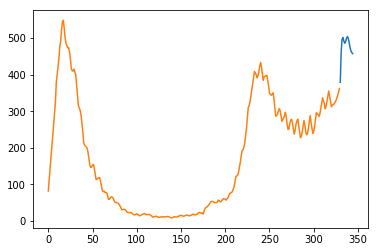

In [216]:
yy = covid.function_Nostradamus(15)
plt.plot((np.linspace(330,344,15)),yy*covid.stdDf+covid.meanDf )
plt.plot(np.linspace(0,329,330), covid.dfSmooth[0:330]*covid.stdDf+covid.meanDf)